In [13]:
!pip install isbnlib
!pip install newspaper3k
!pip install goodreads_api_client

ERROR: Could not find a version that satisfies the requirement goodreads_api_client (from versions: none)
ERROR: No matching distribution found for goodreads_api_client


In [14]:
pip install goodreads

In [15]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import isbnlib
from newspaper import Article
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from tqdm import tqdm
from progressbar import ProgressBar
import re
from scipy.cluster.vq import kmeans, vq
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from goodreads import client
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [16]:
import warnings
warnings.filterwarnings("ignore")

# #Getting Basic Ideas

In [18]:
import pandas as pd
import isbnlib

# Load your CSV file
df = pd.read_csv("file_updated2.csv")  # Change filename accordingly




In [19]:
df = pd.read_csv("file_updated2.csv", on_bad_lines="skip")

In [20]:
df.index = df['bookID']

In [21]:
#Finding Number of rows and columns
print("Dataset contains {} rows and {} columns".format(df.shape[0], df.shape[1]))

Dataset contains 52478 rows and 11 columns


# Lets Go

In [22]:
df.head()

Serial No  \
bookID                                                   
2767052-the-hunger-games                             1   
2.Harry_Potter_and_the_Order_of_the_Phoenix          2   
2657.To_Kill_a_Mockingbird                           3   
1885.Pride_and_Prejudice                             4   
41865.Twilight                                       5   

                                                                                  bookID  \
bookID                                                                                     
2767052-the-hunger-games                                        2767052-the-hunger-games   
2.Harry_Potter_and_the_Order_of_the_Phoenix  2.Harry_Potter_and_the_Order_of_the_Phoenix   
2657.To_Kill_a_Mockingbird                                    2657.To_Kill_a_Mockingbird   
1885.Pride_and_Prejudice                                        1885.Pride_and_Prejudice   
41865.Twilight                                                            41865.Twilight   

                                                                                 title  \
bookID                                                                                   
2767052-the-hunger-games                                              The Hunger Games   
2.Harry_Potter_and_the_Order_of_the_Phoenix  Harry Potter and the Order of the Phoenix   
2657.To_Kill_a_Mockingbird                                       To Kill a Mockingbird   
1885.Pride_and_Prejudice                                           Pride and Prejudice   
41865.Twilight                                                                Twilight   

                                                                               authors  \
bookID                                                                                   
2767052-the-hunger-games                                               Suzanne Collins   
2.Harry_Potter_and_the_Order_of_the_Phoenix  J.K. Rowling, Mary GrandPré (Illustrator)   
2657.To_Kill_a_Mockingbird                                                  Harper Lee   
1885.Pride_and_Prejudice                     Jane Austen, Anna Quindlen (Introduction)   
41865.Twilight                                                         Stephenie Meyer   

                                             average_rating language_code  \
bookID                                                                      
2767052-the-hunger-games                               4.33       English   
2.Harry_Potter_and_the_Order_of_the_Phoenix            4.50       English   
2657.To_Kill_a_Mockingbird                             4.28       English   
1885.Pride_and_Prejudice                               4.26       English   
41865.Twilight                                         3.60       English   

                                                 isbn #num_pages  \
bookID                                                             
2767052-the-hunger-games                     9.78E+12        374   
2.Harry_Potter_and_the_Order_of_the_Phoenix  9.78E+12        870   
2657.To_Kill_a_Mockingbird                   1.00E+13        324   
1885.Pride_and_Prejudice                     1.00E+13        279   
41865.Twilight                               9.78E+12        501   

                                             ratings_count  likedPercent  \
bookID                                                                     
2767052-the-hunger-games                           6376780          96.0   
2.Harry_Potter_and_the_Order_of_the_Phoenix        2507623          98.0   
2657.To_Kill_a_Mockingbird                         4501075          95.0   
1885.Pride_and_Prejudice                           2998241          94.0   
41865.Twilight                                     4964519          78.0   

                                               isbn13  
bookID                                                 
2767052-the-hunger-games                     9.78E+12  
2.Harry_Potte

In [23]:
df.replace(to_replace='J.K. Rowling, Mary GrandPré (Illustrator)', value = 'J.K. Rowling', inplace=True)

In [24]:
df.head()

Serial No  \
bookID                                                   
2767052-the-hunger-games                             1   
2.Harry_Potter_and_the_Order_of_the_Phoenix          2   
2657.To_Kill_a_Mockingbird                           3   
1885.Pride_and_Prejudice                             4   
41865.Twilight                                       5   

                                                                                  bookID  \
bookID                                                                                     
2767052-the-hunger-games                                        2767052-the-hunger-games   
2.Harry_Potter_and_the_Order_of_the_Phoenix  2.Harry_Potter_and_the_Order_of_the_Phoenix   
2657.To_Kill_a_Mockingbird                                    2657.To_Kill_a_Mockingbird   
1885.Pride_and_Prejudice                                        1885.Pride_and_Prejudice   
41865.Twilight                                                            41865.Twilight   

                                                                                 title  \
bookID                                                                                   
2767052-the-hunger-games                                              The Hunger Games   
2.Harry_Potter_and_the_Order_of_the_Phoenix  Harry Potter and the Order of the Phoenix   
2657.To_Kill_a_Mockingbird                                       To Kill a Mockingbird   
1885.Pride_and_Prejudice                                           Pride and Prejudice   
41865.Twilight                                                                Twilight   

                                                                               authors  \
bookID                                                                                   
2767052-the-hunger-games                                               Suzanne Collins   
2.Harry_Potter_and_the_Order_of_the_Phoenix                               J.K. Rowling   
2657.To_Kill_a_Mockingbird                                                  Harper Lee   
1885.Pride_and_Prejudice                     Jane Austen, Anna Quindlen (Introduction)   
41865.Twilight                                                         Stephenie Meyer   

                                             average_rating language_code  \
bookID                                                                      
2767052-the-hunger-games                               4.33       English   
2.Harry_Potter_and_the_Order_of_the_Phoenix            4.50       English   
2657.To_Kill_a_Mockingbird                             4.28       English   
1885.Pride_and_Prejudice                               4.26       English   
41865.Twilight                                         3.60       English   

                                                 isbn #num_pages  \
bookID                                                             
2767052-the-hunger-games                     9.78E+12        374   
2.Harry_Potter_and_the_Order_of_the_Phoenix  9.78E+12        870   
2657.To_Kill_a_Mockingbird                   1.00E+13        324   
1885.Pride_and_Prejudice                     1.00E+13        279   
41865.Twilight                               9.78E+12        501   

                                             ratings_count  likedPercent  \
bookID                                                                     
2767052-the-hunger-games                           6376780          96.0   
2.Harry_Potter_and_the_Order_of_the_Phoenix        2507623          98.0   
2657.To_Kill_a_Mockingbird                         4501075          95.0   
1885.Pride_and_Prejudice                           2998241          94.0   
41865.Twilight                                     4964519          78.0   

                                               isbn13  
bookID                                                 
2767052-the-hunger-games                     9.78E+12  
2.Harry_Potte

Columns Description:
bookID =>Contains the unique ID for each book/series
title=> contains the titles of the books
authors=> contains the author of the particular book
average_rating=> the average rating of the books, as decided by the users
ISBN=> ISBN(10) number, tells the information about a book - such as edition and publisher
language_code=> Tells the language for the books
Num_pages=> Contains the number of pages for the book
Ratings_count=> Contains the number of ratings given for the book
likedPercentage=>Likes in%ange left by users

# Exploratory Data Analysis

Which are the books with most occurances in the list?

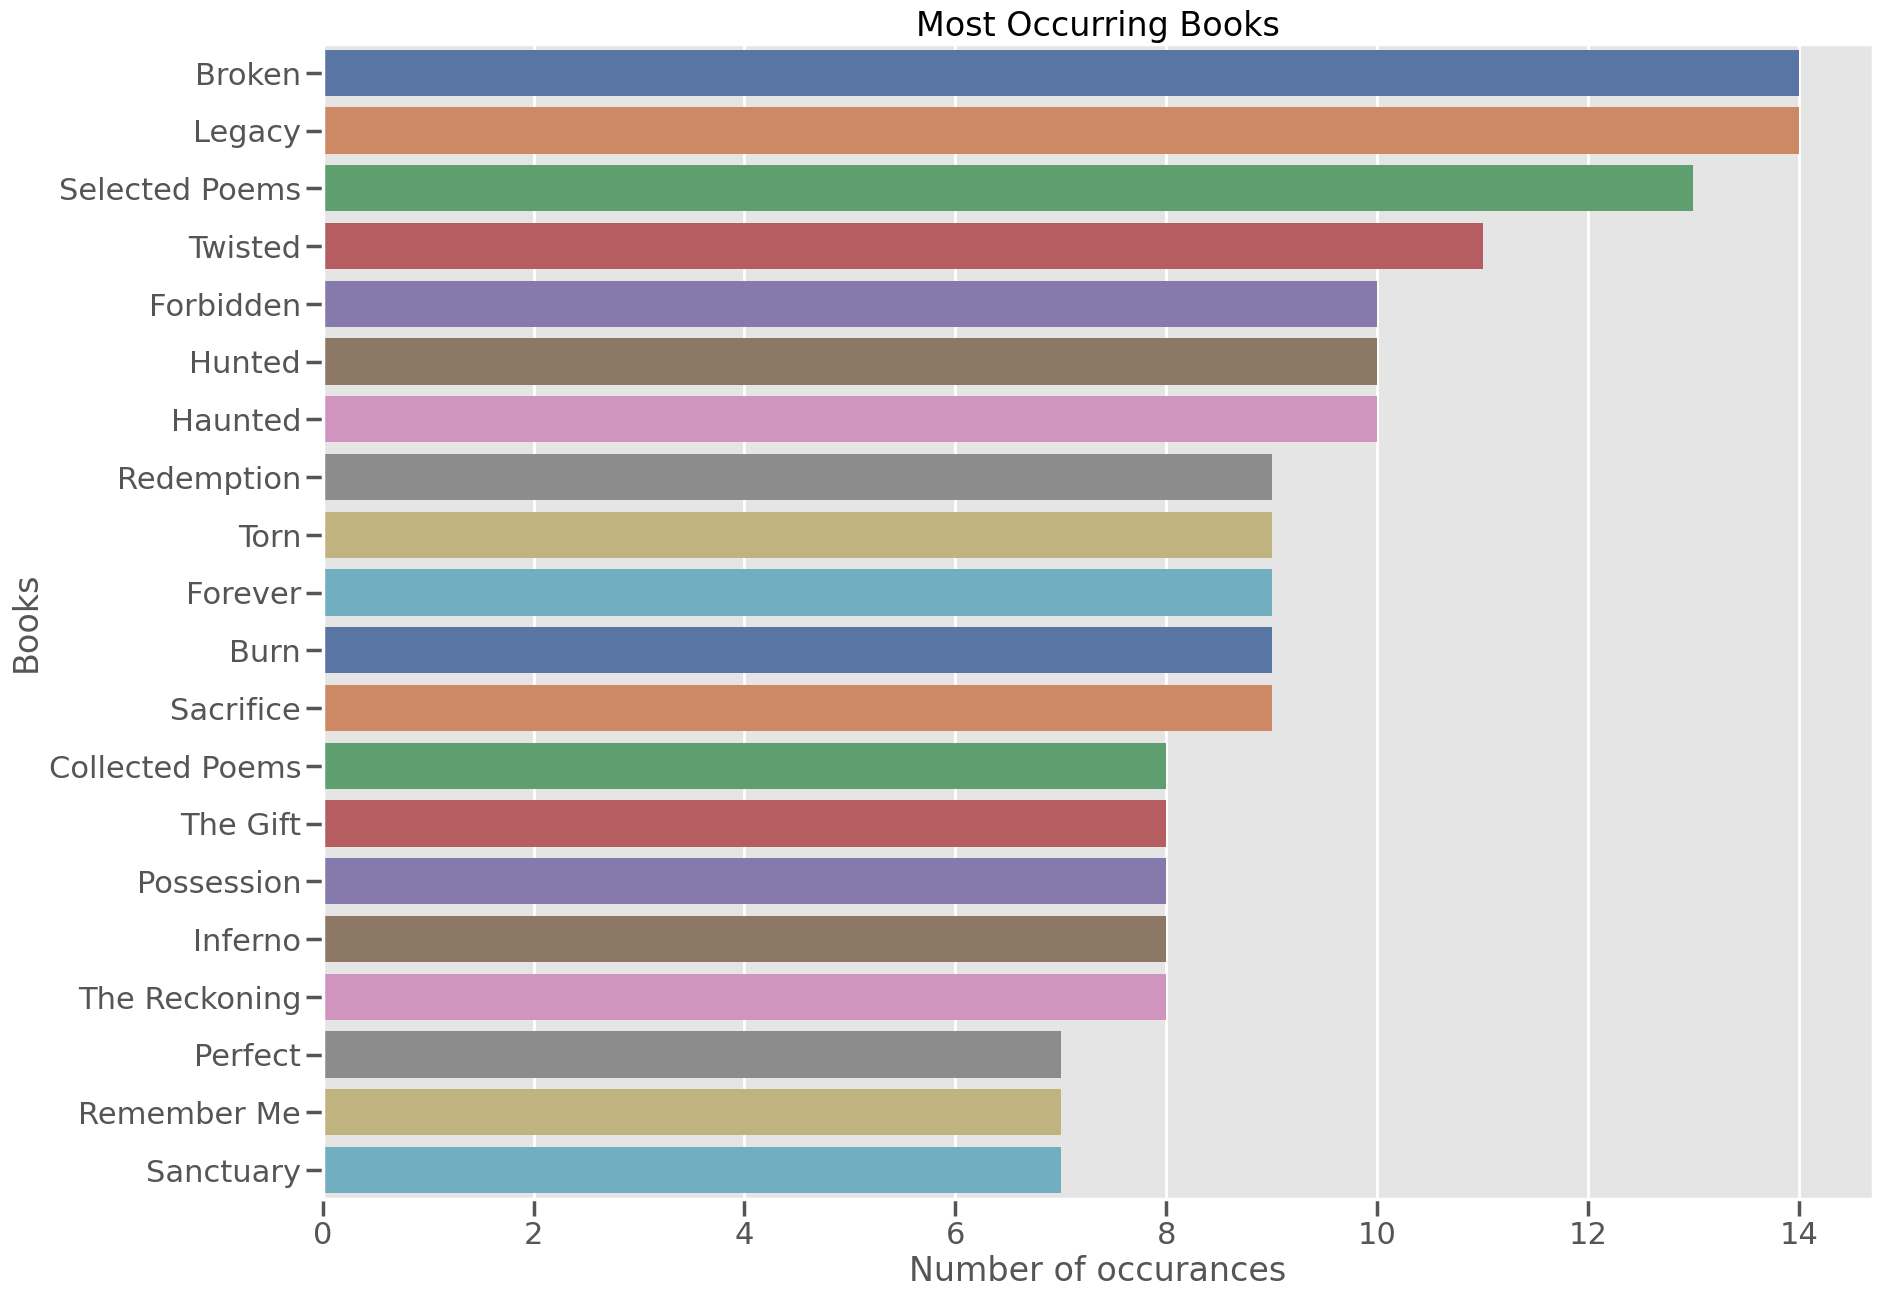

In [25]:
#Taking the first 20:

sns.set_context('poster')
plt.figure(figsize=(20,15))
books = df['title'].value_counts()[:20]
rating = df.average_rating[:20]
sns.barplot(x = books, y = books.index, palette='deep')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

We can see that One Hundred Years Of Solitude and Salem's List have the most number of occurrances with the same name in the data.

These books have come up in this database over and over again, with various publication editions. From the list, we can see that most of the books from the given chart are either old, steadfast classics or books which are usually assigned to schools. Seems like some books do age well, and these have just braved the flow of time.

What is the distribution of books for all languages?

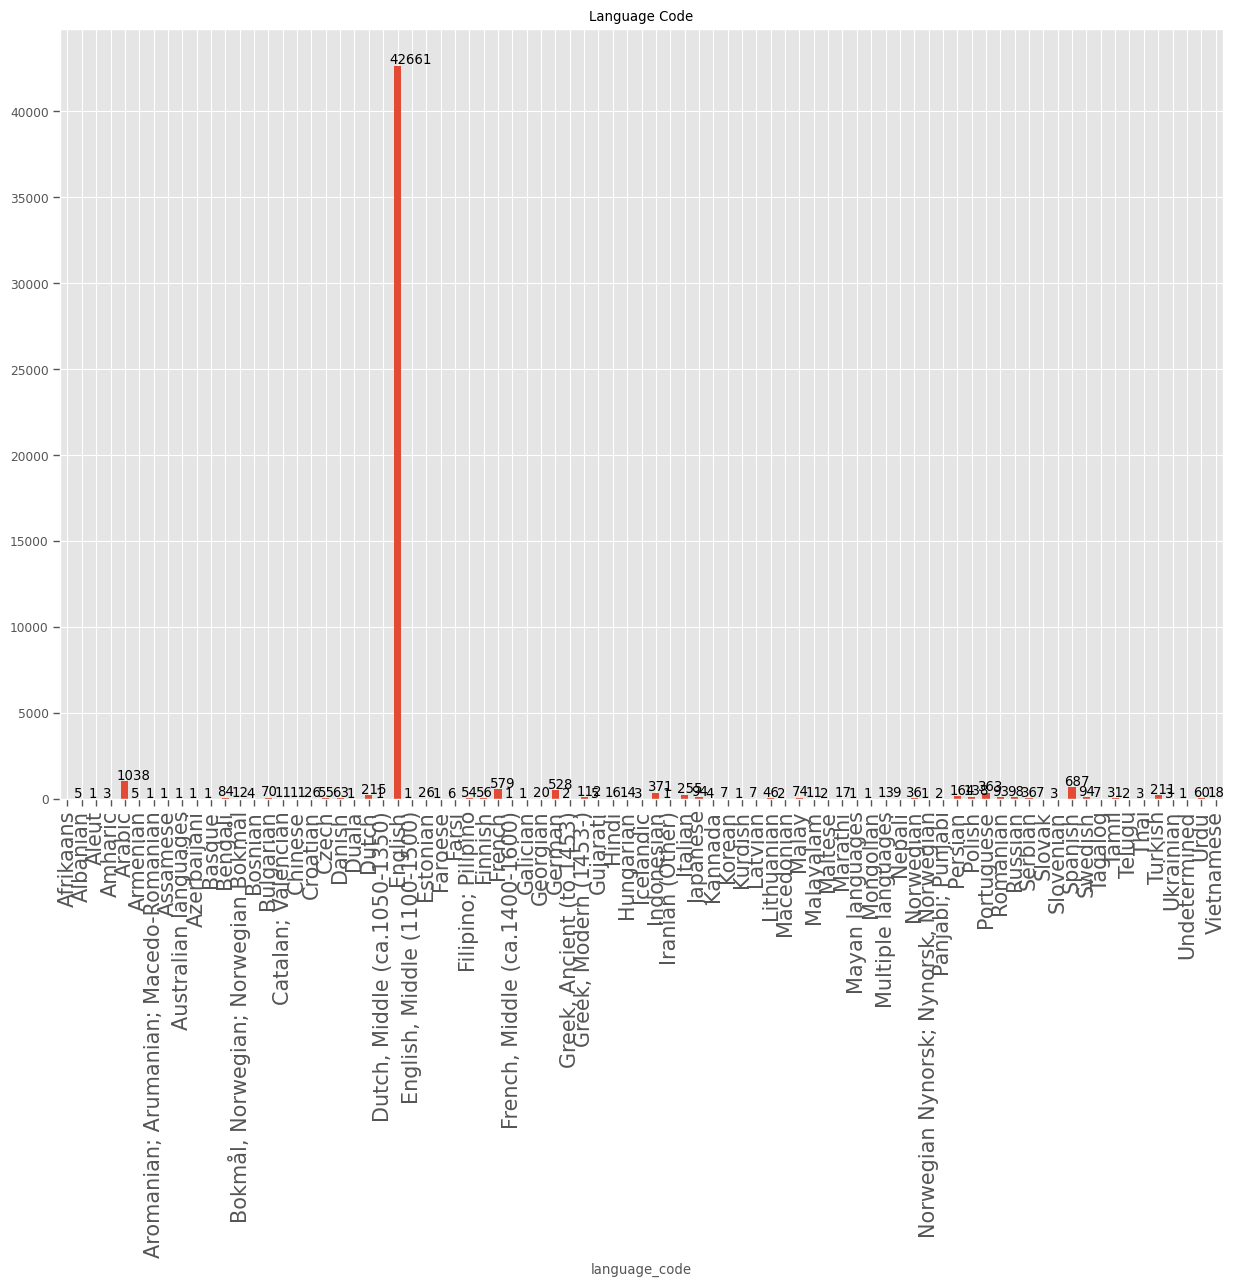

In [26]:
sns.set_context('paper')
plt.figure(figsize=(15,10))
ax = df.groupby('language_code')['title'].count().plot.bar()
plt.title('Language Code')
plt.xticks(fontsize = 15)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()-0.3, p.get_height()+100))

From the given graph, we can infer that in the given data, majority of the books are in english languages.

Which are the top 10 most rated books?

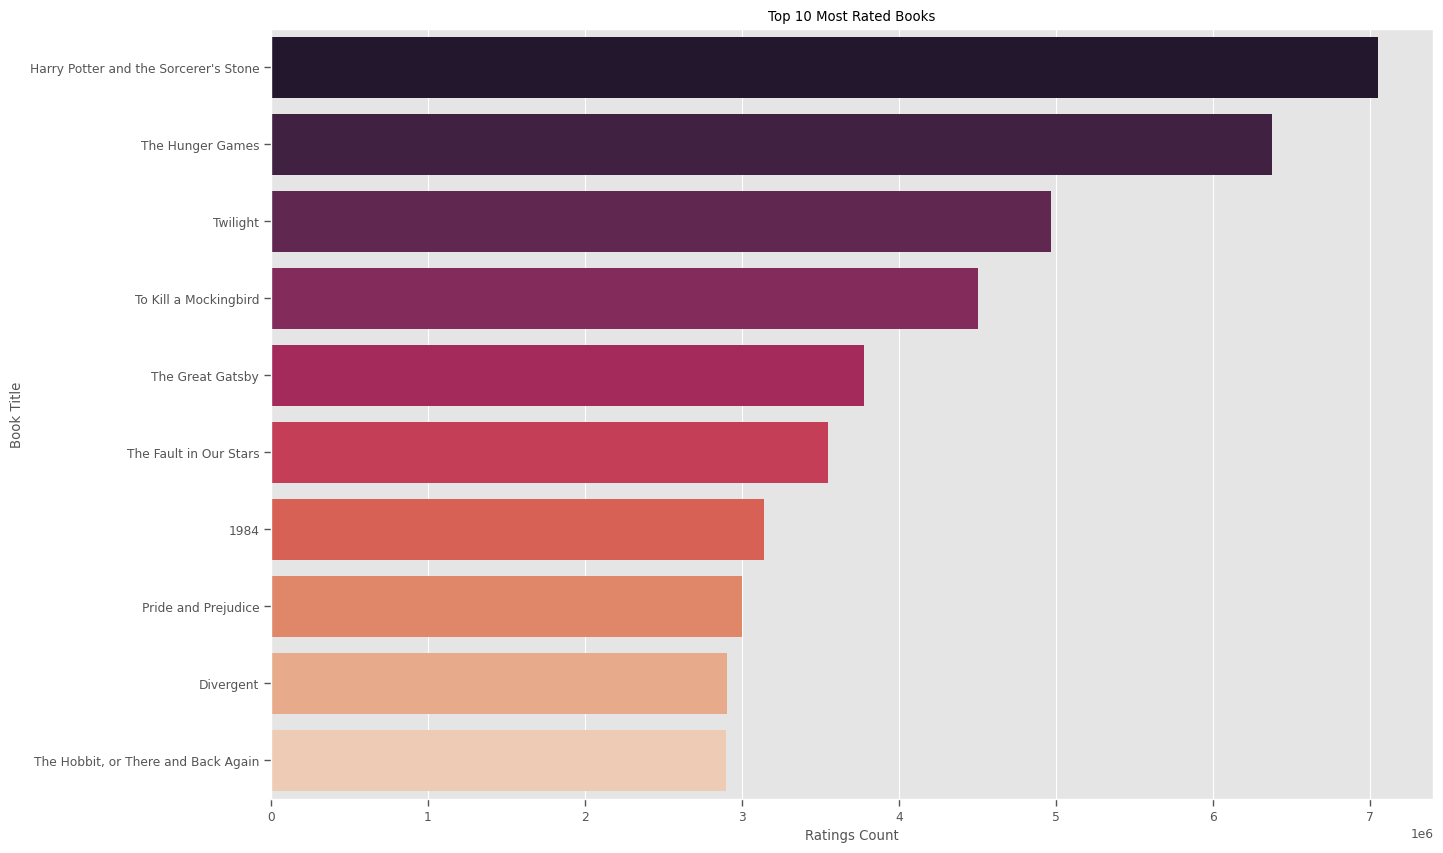

In [30]:
most_rated = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')

plt.figure(figsize=(15,10))
sns.barplot(x=most_rated['ratings_count'], y=most_rated.index, palette='rocket')

plt.xlabel("Ratings Count")
plt.ylabel("Book Title")
plt.title("Top 10 Most Rated Books")
plt.show()

Which are the authors with most books?

Popular Series Dominate – Just like before, books that are part of well-known series tend to gather the highest ratings. Harry Potter and the Sorcerer’s Stone, The Hunger Games, and Twilight top the list, indicating that readers are more inclined to engage with book series.

Classic Literature Holds Strong – Despite the dominance of series, standalone classics like To Kill a Mockingbird, The Great Gatsby, and 1984 continue to be widely rated and read, proving their timeless appeal across generations.

Dystopian Fiction’s Strong Presence – Books like The Hunger Games, 1984, and Divergent suggest a significant interest in dystopian themes, reflecting readers’ curiosity about speculative and thought-provoking narratives.

Young Adult (YA) Books Gain Attention – A noticeable trend is the strong presence of Young Adult (YA) books (The Fault in Our Stars, Divergent, Twilight). These books seem to attract a large audience, possibly due to their engaging narratives and relatable themes.

Variability in Series Engagement – Comparing Harry Potter and the Sorcerer’s Stone and The Hobbit, we notice that while both are fantasy classics, Harry Potter appears to have significantly more ratings. This suggests that certain franchises manage to sustain higher levels of engagement throughout their sequels.

The data strongly indicates that both book series and literary classics dominate the reading landscape, with specific genres like YA, fantasy, and dystopian fiction receiving consistent attention from readers.

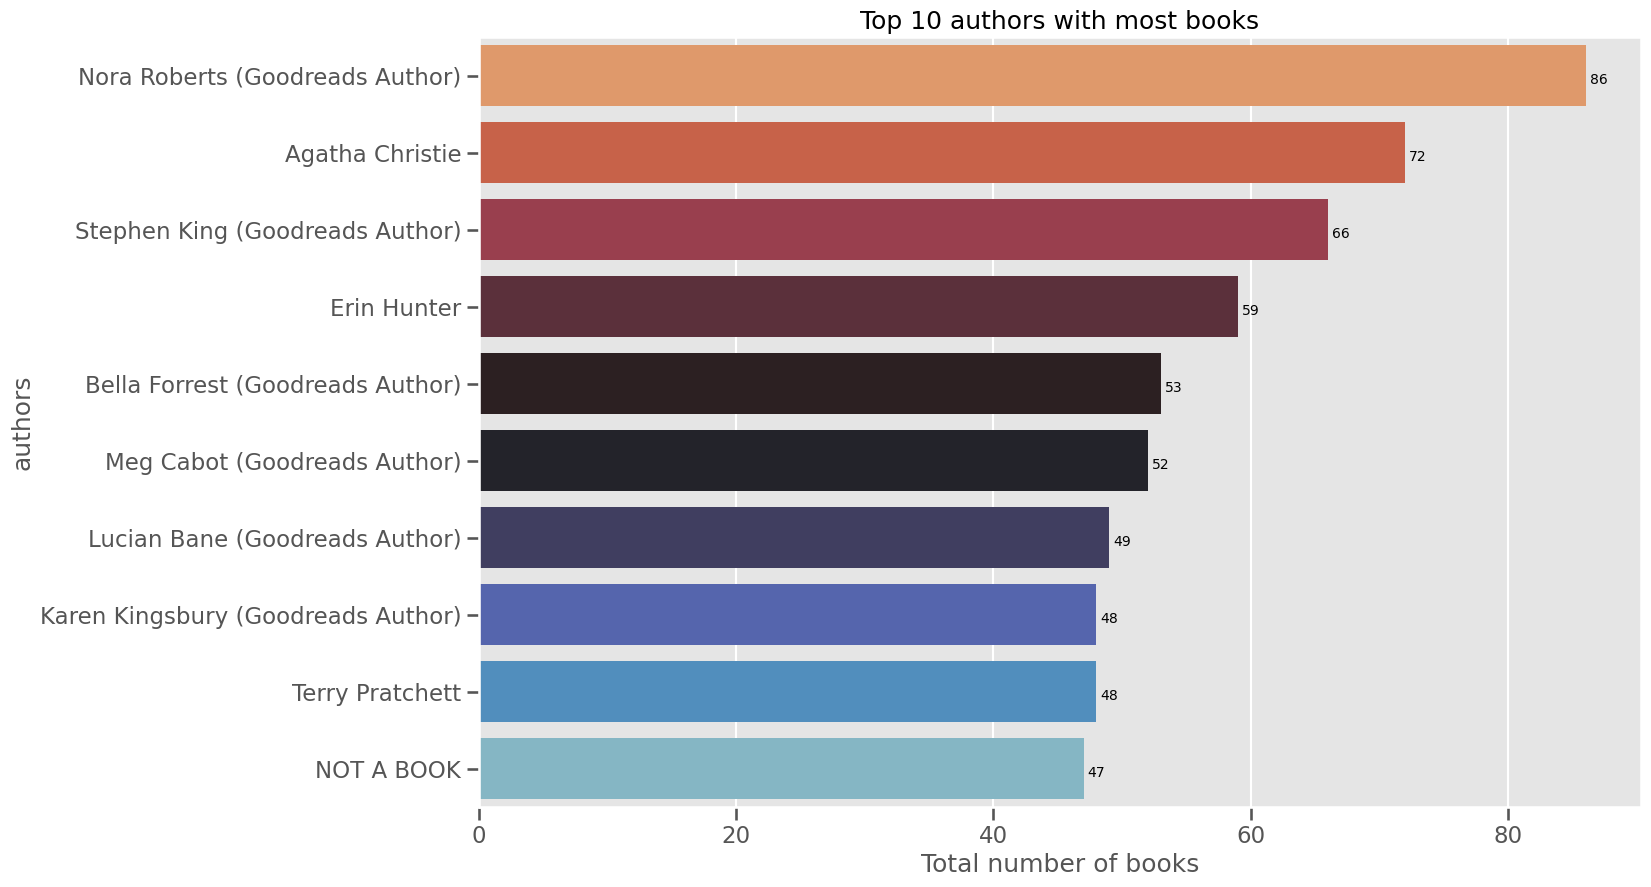

In [31]:
sns.set_context('talk')
most_books = df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('authors')
plt.figure(figsize=(15,10))

# Corrected barplot function
ax = sns.barplot(x=most_books['title'], y=most_books.index, palette='icefire_r')

ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")

# Annotating the bars
for i in ax.patches:
    ax.text(i.get_width() + 0.3, i.get_y() + 0.5, str(round(i.get_width())), 
            fontsize=10, color='k')


Conclusion from the Chart:
Nora Roberts has authored the most books in this dataset, with 86 books, followed by Agatha Christie (72 books) and Stephen King (66 books).

Erin Hunter, Bella Forrest, and Meg Cabot also have a significant number of books, ranging between 52-59.

The presence of "NOT A BOOK" suggests a possible data anomaly or an incorrect entry in the dataset.

The overall trend shows that prolific authors tend to have more than 45 books in this dataset.

Many of the listed authors are well-known for their extensive works in genres like mystery, fantasy, romance, and thriller.

Getting overall performance for an author over time

In [32]:
# Creating a function to get book details from the ISBN 13 value.

#Alternate scraping solution, when both the API(s) fails
def html(isbn):
    url = 'https://isbndb.com/book/'+isbn
    article = Article(url)
    #article = 'https://isbndb.com/book/9780450524684'
    article.download()
    article.parse()
    ar = article.html
    ar = ar[9300:9900]
    return ar

def reg(l):
    return re.search(r'(\b\d{4})\b',l).groups()[0]
    
#Gathering the data for the year column for the books from their ISBN 13 values
def bookdata(df):
    year=[]
    pbar = ProgressBar()
    for isbn in pbar(df.isbn13):
        try:
            details = isbnlib.meta(isbn)
            year.append(details['Year'])
        except :
            #Trying out with goodreads api now
            try: 
                book_detail = client.Book.show_by_isbn(isbn)
                keys_wanted = ['publication_year']
                reduced_book = {k:v for k,v in book_detail.items() if k in keys_wanted}
                year.append((reduced_book['publication_year']))
            
            except: 
                #Going with webscraping
                try:
                    y = html(isbn)
                    year_extracted = reg(y) #Extracting year with regex
                    year.append(y)
                except:
                    year.append('0')
                
    return year

def plot_author_chart(author_df):
    year = bookdata(author_df)
    author_df = final_df(author_df, year)
    author_df.dropna(0, inplace=True)
    author_df = author_df[author_df['Year'].str.isnumeric()]
    author_df = author_df.set_index('title')
    author_df = author_df[author_df.Year !='0']
    plt.figure(figsize=(15,15))
    sns.set_context('talk')
    plt.xticks(rotation=30)
    ax =  sns.barplot( author_df['Year'], author_df['average_rating'], palette='deep')
    ax.set_title("Average rating of books over time, "+ author_df.authors[1])
    plt.xticks(rotation=30)
    return ax



# The finction for getting the final dataframe for the charts
def final_df(df1, l):
    year_df = pd.DataFrame(l, columns=['Year'])
    df1 = df1.reset_index(drop=True)
    final = df1[['authors', 'average_rating', 'title']].join(year_df)
    return final

In [33]:
#Finding the top 15 authors with the most number of books
df['authors'].value_counts().head(10)

authors
Nora Roberts (Goodreads Author)       86
Agatha Christie                       72
Stephen King (Goodreads Author)       66
Erin Hunter                           59
Bella Forrest (Goodreads Author)      53
Meg Cabot (Goodreads Author)          52
Lucian Bane (Goodreads Author)        49
Terry Pratchett                       48
Karen Kingsbury (Goodreads Author)    48
Mercedes Lackey                       47
Name: count, dtype: int64

Which are the top 10 highly rated authors?

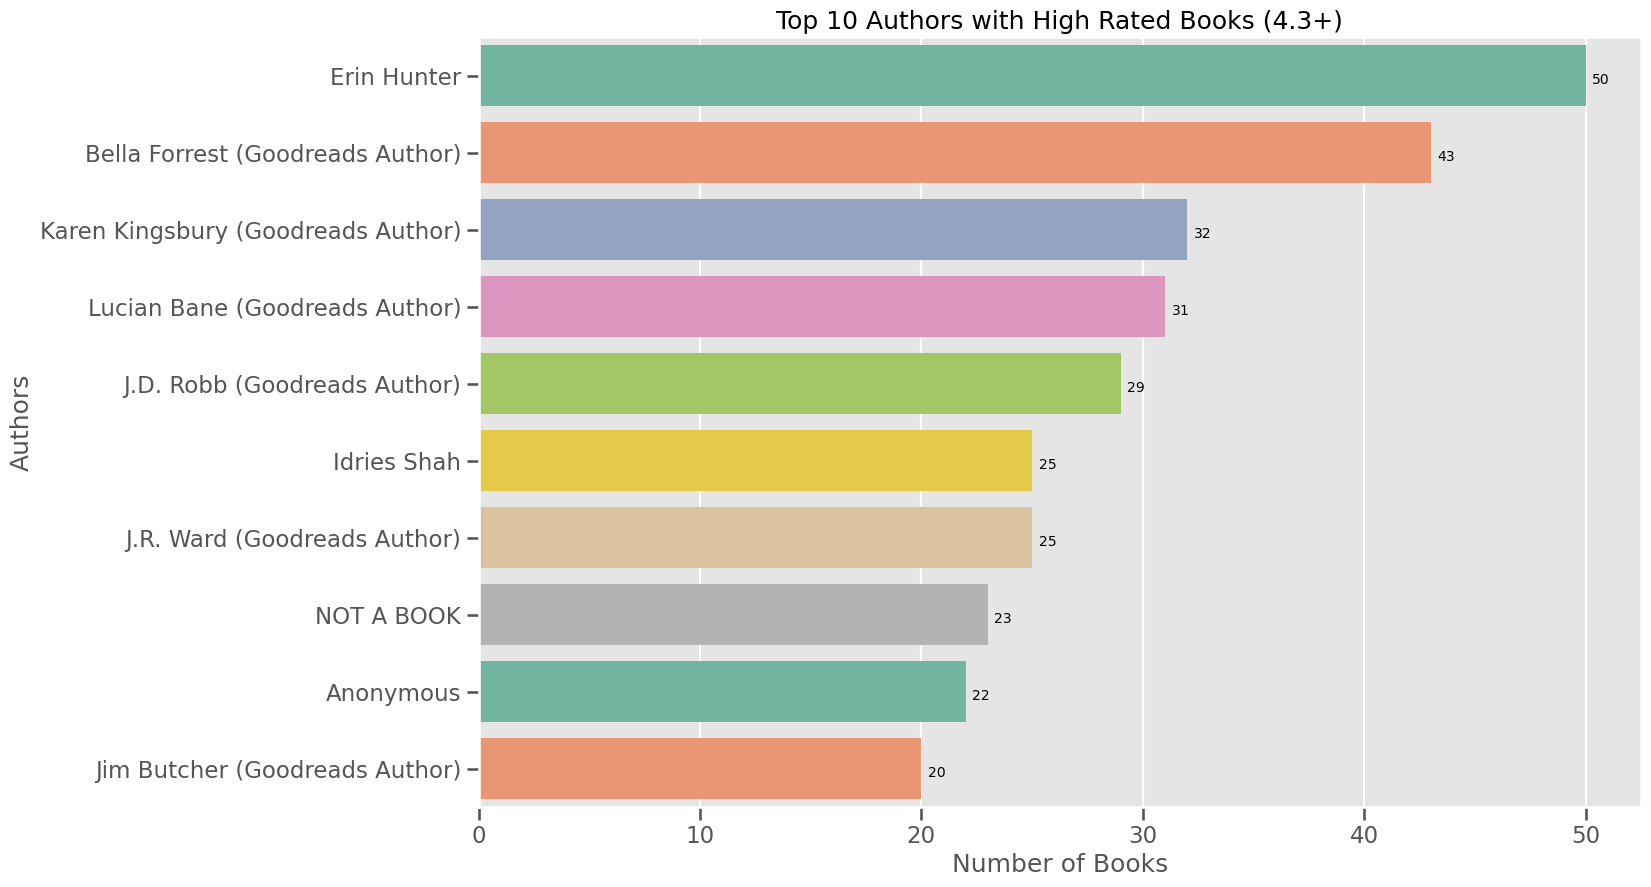

In [36]:
# Filter authors with average rating >= 4.3
high_rated_author = df[df['average_rating'] >= 4.3]

# Count the number of books per author
high_rated_author = (
    high_rated_author.groupby('authors')['title']
    .count()
    .reset_index()
    .sort_values('title', ascending=False)
    .head(10)
    .set_index('authors')
)

# Plotting
plt.figure(figsize=(15, 10))
ax = sns.barplot(x=high_rated_author['title'], y=high_rated_author.index, palette='Set2')

# Labeling
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
ax.set_title("Top 10 Authors with High Rated Books (4.3+)")

# Annotating each bar with its value
for i in ax.patches:
    ax.text(i.get_width() + 0.3, i.get_y() + 0.5, str(round(i.get_width())), fontsize=10, color='k')

plt.show()

The bar chart illustrates the top 10 most prolific authors based on the number of books written. Erin Hunter leads with the highest count, followed closely by Bella Forrest and other notable authors. The visualization highlights variations in book production among authors, providing insights into their literary contributions.

What is the rating distribution for the books?

In [37]:
def segregation(data):
    values = []
    for val in data.average_rating:
        if val>=0 and val<=1:
            values.append("Between 0 and 1")
        elif val>1 and val<=2:
            values.append("Between 1 and 2")
        elif val>2 and val<=3:
            values.append("Between 2 and 3")
        elif val>3 and val<=4:
            values.append("Between 3 and 4")
        elif val>4 and val<=5:
            values.append("Between 4 and 5")
        else:
            values.append("NaN")
    print(len(values))
    return values

In [38]:
df.average_rating.isnull().value_counts()

average_rating
False    52478
Name: count, dtype: int64

In [39]:
df.dropna(axis=0, inplace=True)  # axis=0 removes rows with NaN values
#Removing Any null values

<Axes: xlabel='average_rating', ylabel='Density'>

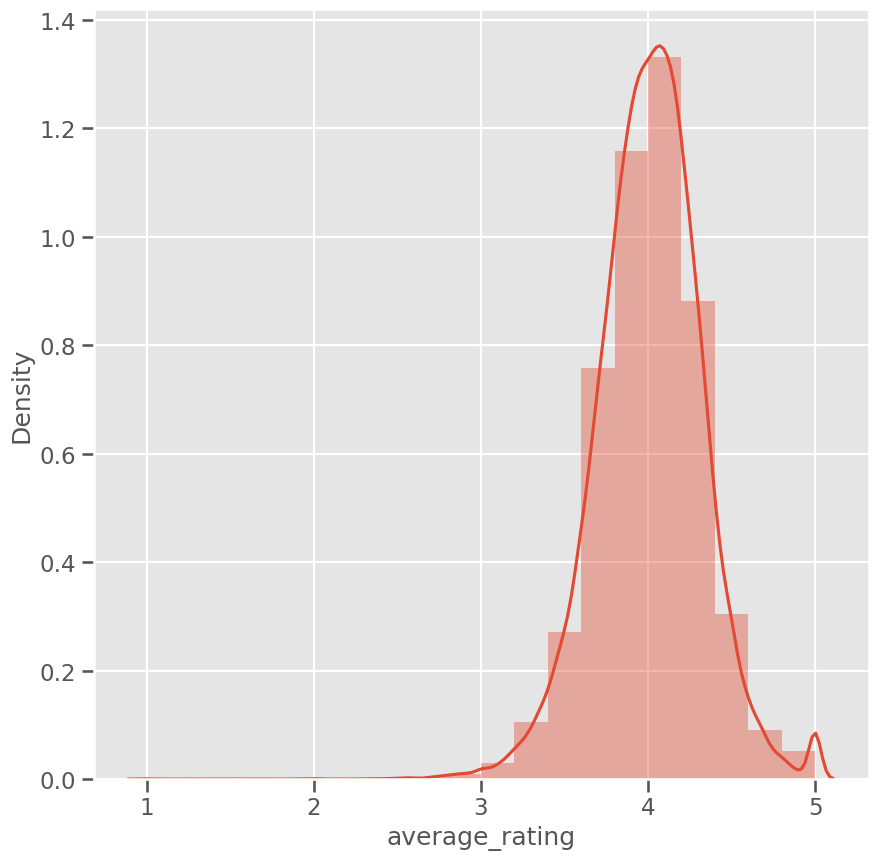

In [40]:
plt.figure(figsize=(10,10))
rating= df.average_rating.astype(float)
sns.distplot(rating, bins=20)

From the given plot, we can infer that:

Majority of the ratings lie near 3.7-4.3, approximately.
Books having scores near 5 are  rare

46682


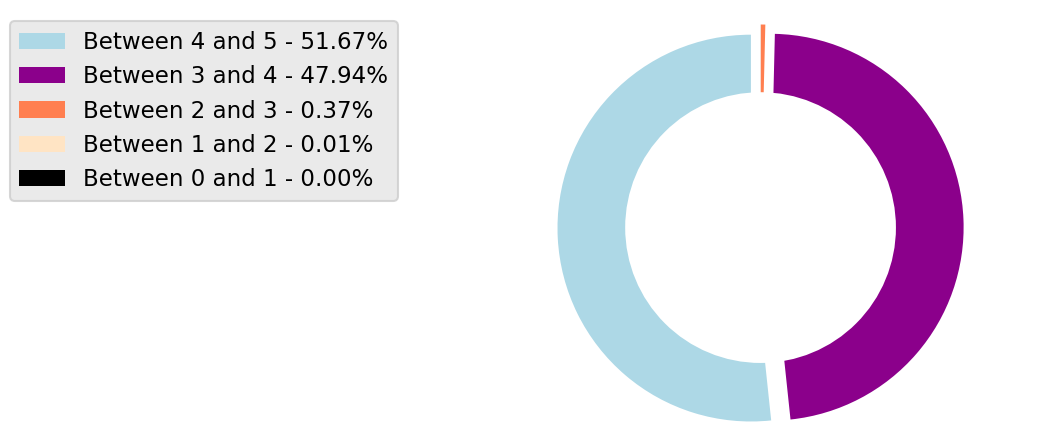

In [41]:
df['Ratings_Dist'] = segregation(df)

# Count the occurrences and reset index properly
ratings_pie = df['Ratings_Dist'].value_counts().reset_index()
ratings_pie.columns = ['Category', 'Count']  # Explicitly renaming columns

# Extracting labels and computing percentages
labels = ratings_pie['Category']
colors = ['lightblue', 'darkmagenta', 'coral', 'bisque', 'black']
percent = 100. * ratings_pie['Count'] / ratings_pie['Count'].sum()

# Plot pie chart
fig, ax1 = plt.subplots()
ax1.pie(
    ratings_pie['Count'], 
    colors=colors, 
    pctdistance=0.85, 
    startangle=90, 
    explode=(0.05, 0.05, 0.05, 0.05, 0.05)
)

# Draw a center circle to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures pie is drawn as a circle
plt.axis('equal')
plt.tight_layout()

# Format legend labels with category and percentage
legend_labels = [f'{i} - {j:.2f}%' for i, j in zip(labels, percent)]
plt.legend(legend_labels, loc='best', bbox_to_anchor=(-0.1, 1.0))

plt.show()


Surprisingly, it can be seen that the ratings between 0 and 1 are much more numerous in number, leading to a conclusion that if a person does read a book and end up hating it, it'll still get a minimum of around 2 stars, just for the effort they put up for reading the book.

The kurtosis of the graph just seems to land between 3 and 4, signifying that for the effort it took to read, and the thrilling, unputdownable nature of the book, the majority of the ratings lie between 3 and 4.

Is there any relationship between ratings and review counts?

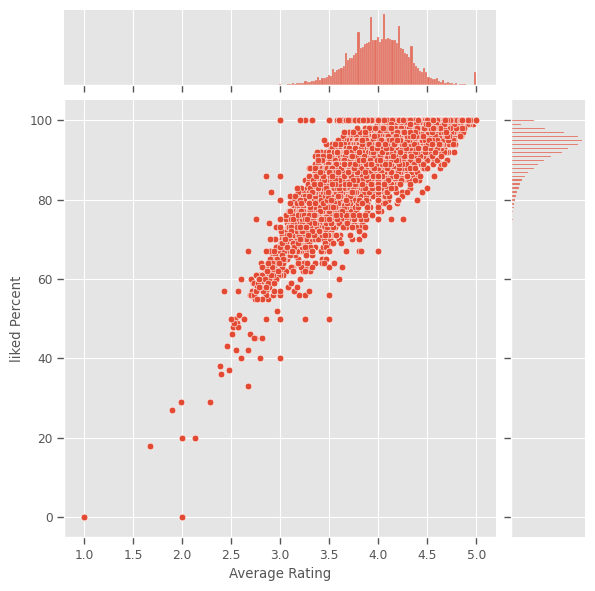

In [42]:
# Checking for any relation between text review count and average rating
df.dropna(inplace=True)  # Corrected dropna() usage

sns.set_context('paper')

# Create joint plot
ax = sns.jointplot(
    x="average_rating", 
    y="likedPercent", 
    kind='scatter',  
    data=df[['likedPercent', 'average_rating']]
)

# Set axis labels
ax.set_axis_labels("Average Rating", "liked Percent")

plt.show()


Conclusion on Liked Percentage and Average Rating
The scatter plot with marginal histograms shows a strong positive correlation between the average rating and the liked percentage of books. As the average rating increases, the liked percentage also rises, indicating that books with higher ratings tend to be liked by a greater proportion of readers. However, there is some variance at lower ratings, where the liked percentage is more spread out. The distribution suggests that most books have an average rating between 3.0 and 4.5, with a liked percentage typically above 60%

In [43]:
trial = df[~(df['likedPercent']>60)]

<Figure size 1500x1000 with 0 Axes>

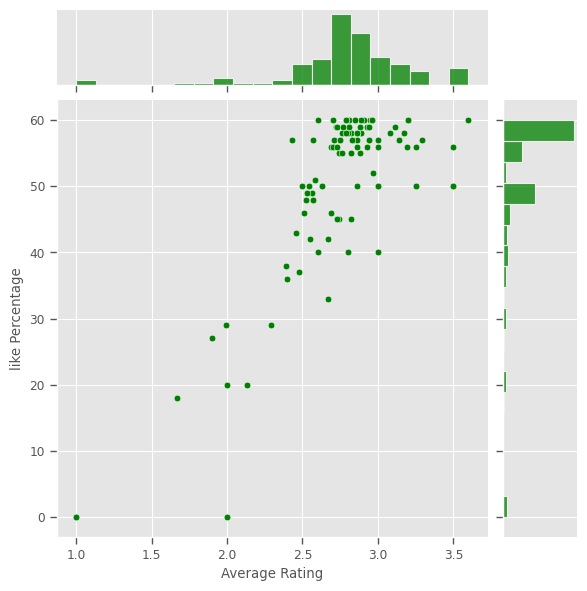

In [44]:
#Checking for any relation between them.
plt.figure(figsize=(15,10))
df.dropna(axis=0, inplace=True)
sns.set_context('paper')
ax =sns.jointplot(x="average_rating",y='likedPercent', kind='scatter',  data= trial, color = 'green')
ax.set_axis_labels("Average Rating", "like Percentage")
plt.show()

Conclusion on Liked Percentage and Average Rating


The scatter plot suggests a moderate positive correlation between the average rating and the liked percentage of books. While books with higher ratings tend to have a greater liked percentage, the data points show more dispersion, especially for lower ratings. The concentration of points above a 50% liked percentage for ratings between 2.5 and 3.5 suggests that most books in this range are generally well-received. However, the limited range of average ratings indicates that this dataset may have fewer high-rated books.

Is there a relationship between number of pages and ratings?

<Figure size 1500x1000 with 0 Axes>

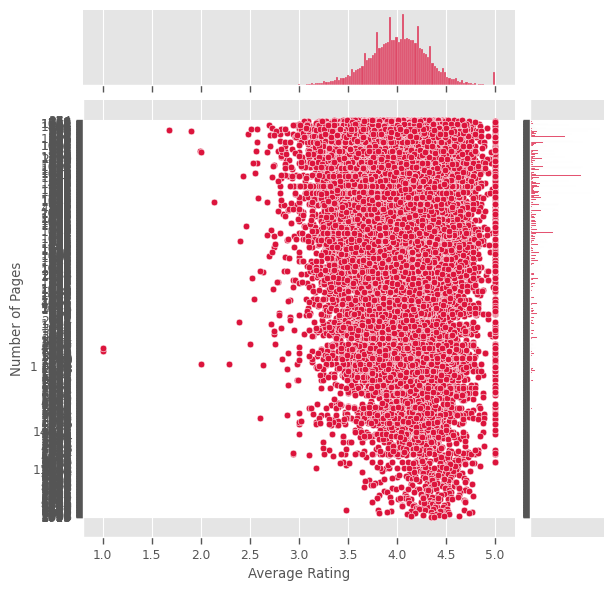

In [45]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="#num_pages", data = df, color = 'crimson')
ax.set_axis_labels("Average Rating", "Number of Pages")

Analysis: This plot lacks a clear inference due to the significant presence of outliers for books exceeding 500 pages. The highest density of books falls within the 0-500 page range, making it difficult to establish a strong correlation between the number of pages and average rating

Based on that logic, let's explore the scenario in that range:

Text(38.541666666666664, 0.5, 'Number of Pages')

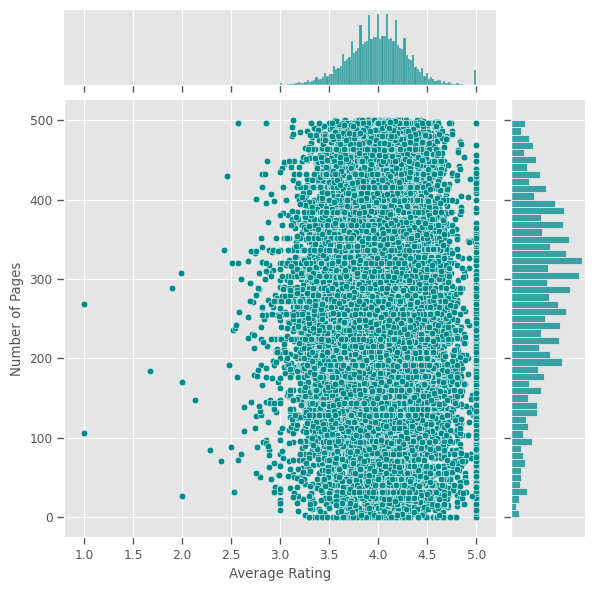

In [46]:
df = df.loc[:, ~df.columns.duplicated()]

# Convert '#num_pages' to numeric
df['#num_pages'] = pd.to_numeric(df['#num_pages'], errors='coerce')

# Drop NaN values
df = df.dropna(subset=['average_rating', '#num_pages'])

# Remove books with more than 500 pages
trial = df[df['#num_pages'] <= 500]

# Create jointplot
ax = sns.jointplot(x="average_rating", y="#num_pages", data=trial, color='darkcyan')

# Set axis labels
ax.ax_joint.set_xlabel("Average Rating")
ax.ax_joint.set_ylabel("Number of Pages")

Analysis
From the given plot, we can infer that books with 200-400 pages tend to receive the highest ratings, with a peak around 250 pages. This suggests that most readers prefer books of moderate length, possibly because they are engaging yet not overwhelming.

On the other hand, thicker books (above 400-500 pages) seem to receive fewer ratings, which might indicate that longer books are less popular or that readers hesitate to commit to lengthy reads. Conversely, short books (below 100 pages) also appear to have more diverse ratings, which could mean that they vary in quality and reader reception.

This trend implies that readers tend to favor books that are long enough to be immersive but not too long to feel daunting.

#Is there a relationship between ratings and ratings count?

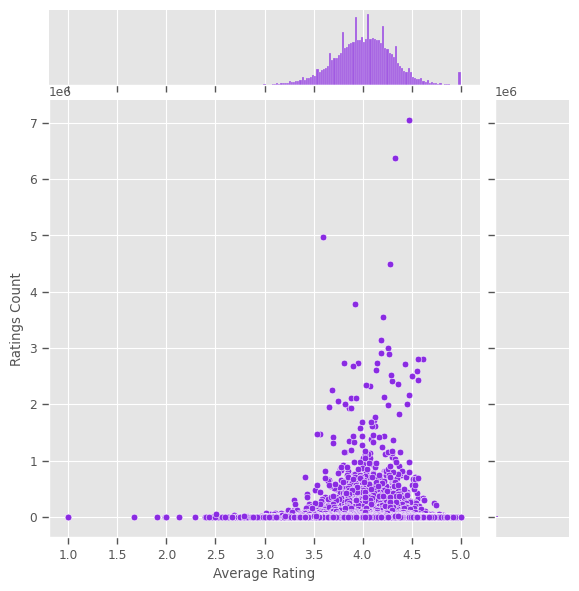

In [47]:
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="ratings_count", data = df, color = 'blueviolet')
ax.set_axis_labels("Average Rating", "Ratings Count")

There seem to be some outliers present in this. For a better outlook, let's consider the count around 2000000 ratings

In [48]:
trial = df[~(df.ratings_count>2000000)]

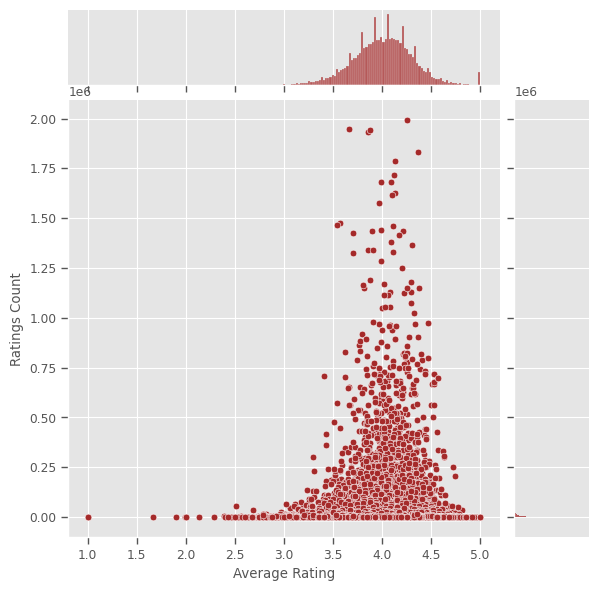

In [49]:
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="ratings_count", data = trial, color = 'brown')
ax.set_axis_labels("Average Rating", "Ratings Count")

From the graph, we can see that there can be a potential relationship between the average rating and ratings count. As the number of ratings increase, the rating for the book seems to taper towards 4. The average rating seems to become sparse while the number keeps on decreasing

Which are the books with the highest reviews?

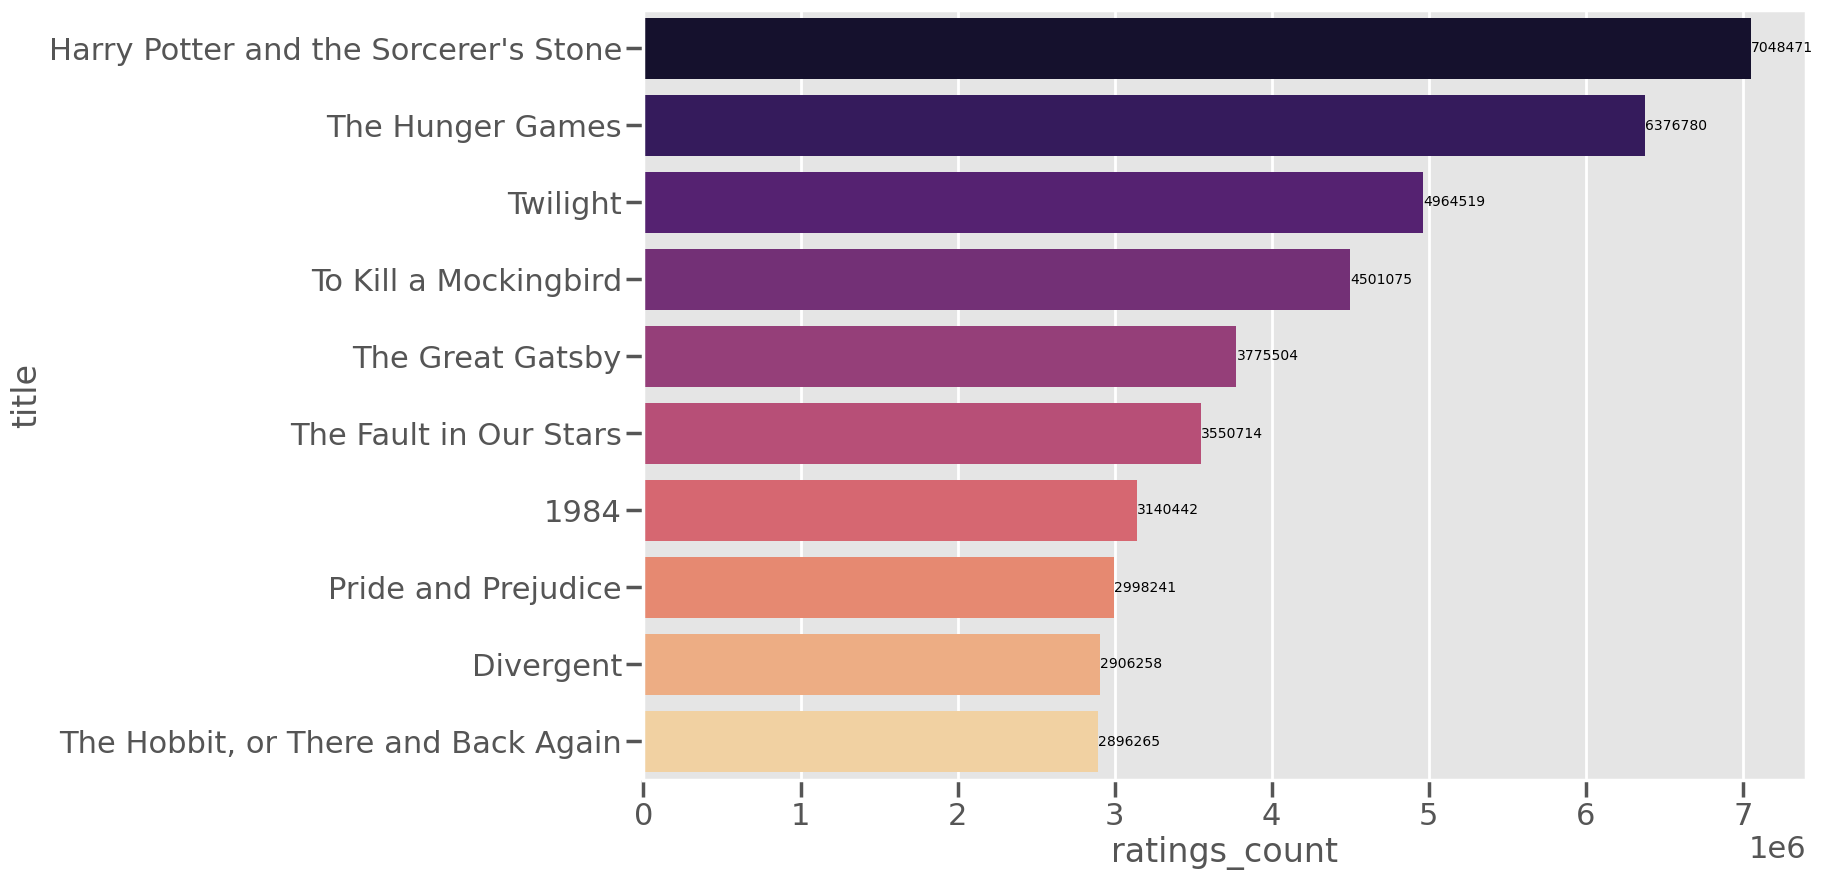

In [50]:
most_text = df.sort_values('ratings_count', ascending=False).head(10).set_index('title')

plt.figure(figsize=(15, 10))
sns.set_context('poster')

# Specify x and y explicitly
ax = sns.barplot(x=most_text['ratings_count'], y=most_text.index, palette='magma')

# Adding text labels on bars
for i in ax.patches:
    ax.text(i.get_width() + 2, i.get_y() + i.get_height() / 2,  # Adjust text position
            str(round(i.get_width())), fontsize=10, color='black', verticalalignment='center')

plt.show()


From all the above inferences, we can fundamentally decide that although the reviews matter, there can't be any specific relation between them and the ranking for all the books

# Topic Modelling`

KMeans Clustering without outliers

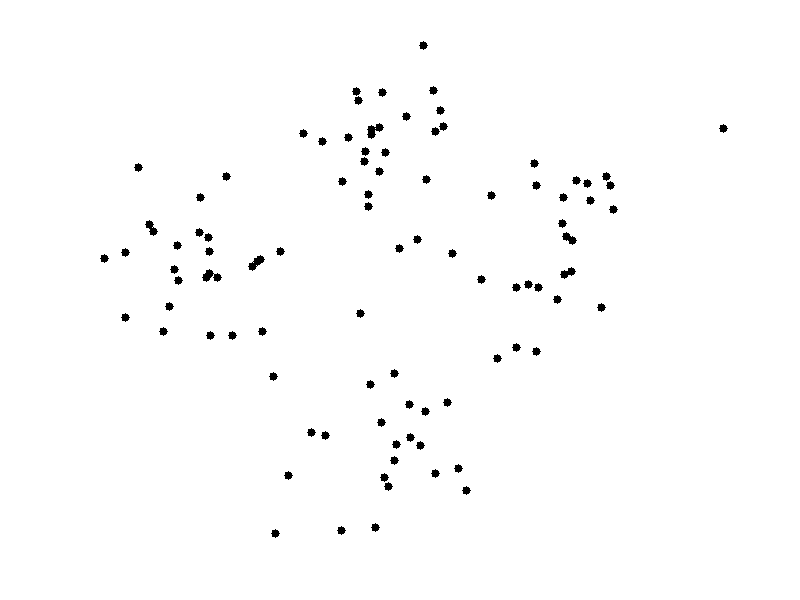

In [51]:
from IPython.display import display, Image

display(Image(filename='random.gif'))  # Use the correct path


KMeans clustering is a type of unsupervised learning which groups unlabelled data. The goal is to find groups in data.

With this, I attepmt to find a relationship or groups between the rating count and average rating value.

In [52]:
trial = df[['average_rating', 'ratings_count']]
data = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T

I'll use the Elbow Curve method for the best way of finding the number of clusters for the data

Text(0.5, 1.0, 'Elbow Curve')

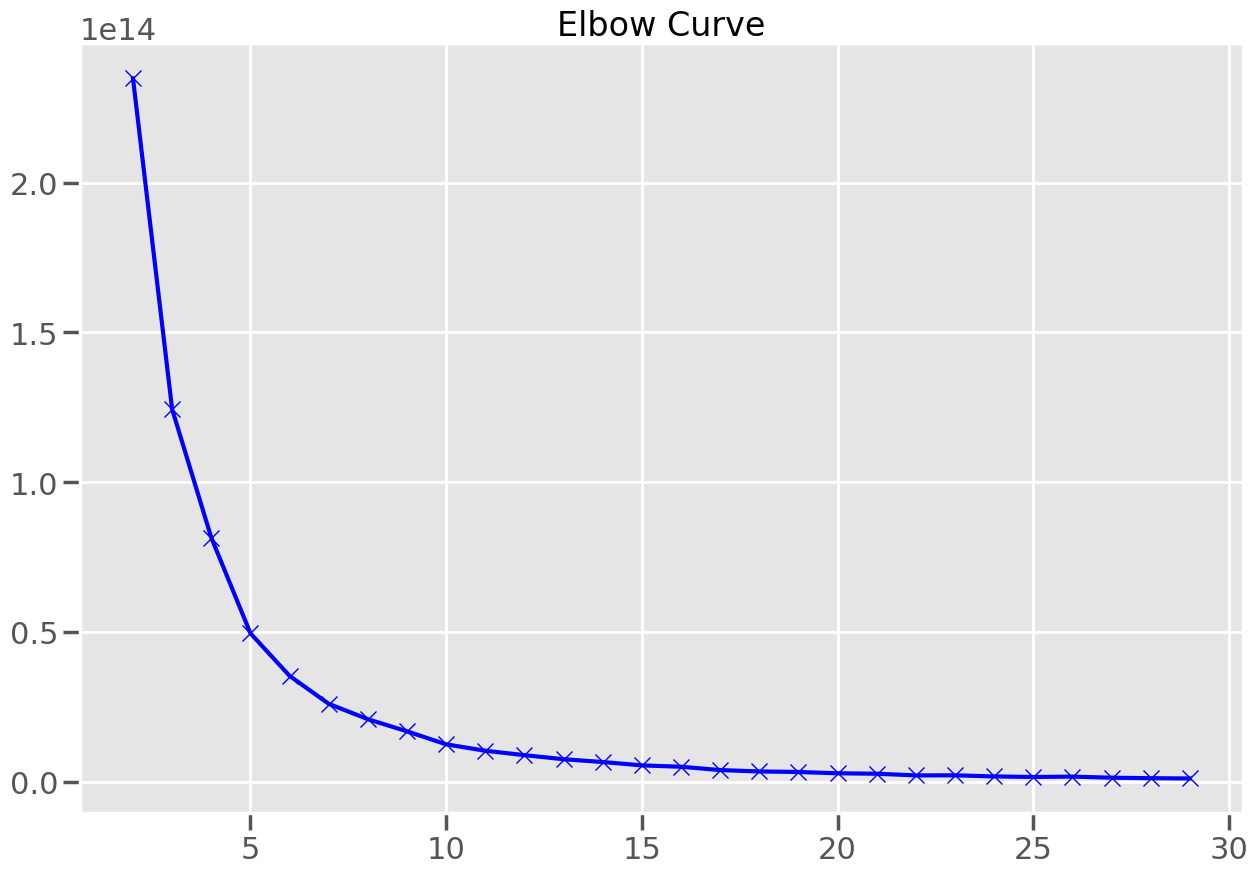

In [53]:
X = data
distortions = []
for k in range(2,30):
    k_means = KMeans(n_clusters = k)
    k_means.fit(X)
    distortions.append(k_means.inertia_)

fig = plt.figure(figsize=(15,10))
plt.plot(range(2,30), distortions, 'bx-')
plt.title("Elbow Curve")

From the above plot, we can see that the elbow lies around the value K=5, so that's what we will attempt it with

In [54]:
#Computing K means with K = 5, thus, taking it as 5 clusters
centroids, _ = kmeans(data, 5)

#assigning each sample to a cluster
#Vector Quantisation:

idx, _ = vq(data, centroids)

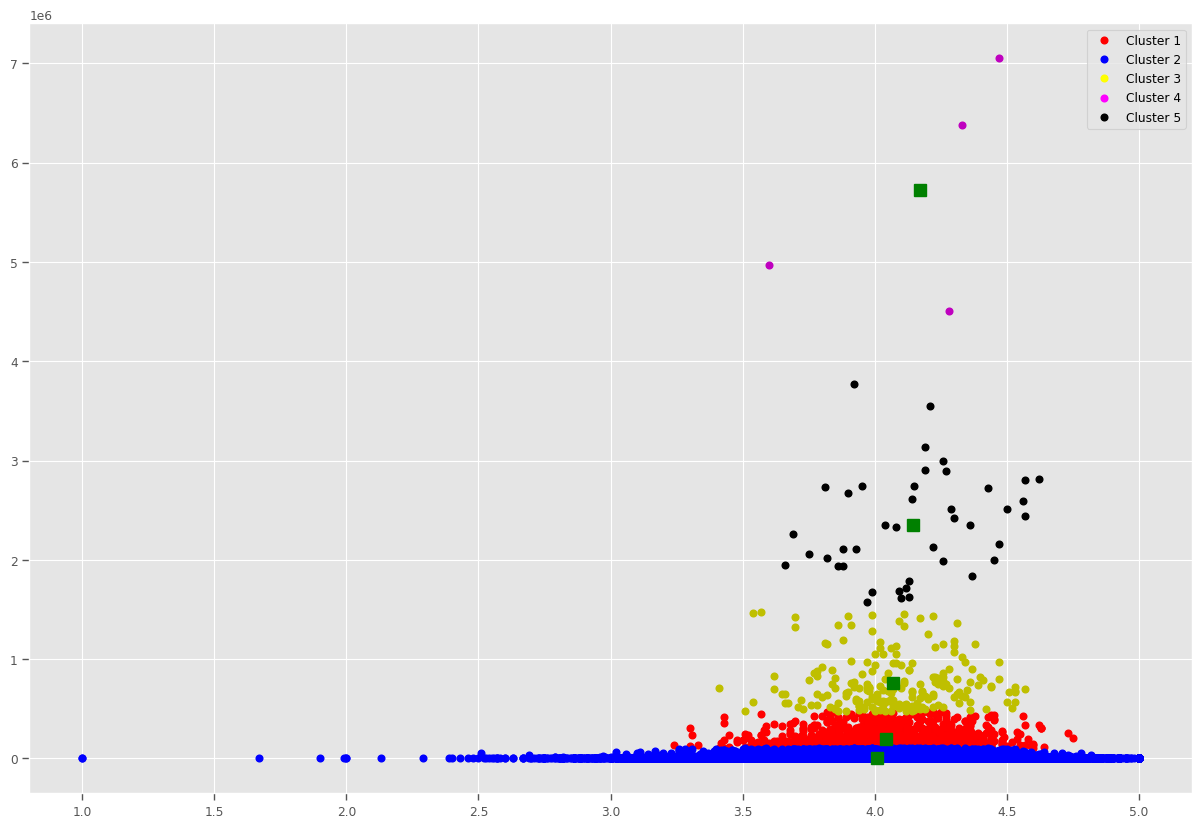

In [55]:
# some plotting using numpy's logical indexing
sns.set_context('paper')
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',#red circles
     data[idx==1,0],data[idx==1,1],'ob',#blue circles
     data[idx==2,0],data[idx==2,1],'oy', #yellow circles
     data[idx==3,0],data[idx==3,1],'om', #magenta circles
     data[idx==4,0],data[idx==4,1],'ok',#black circles
    
     
        
        
        
        
        )
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8, )




circle1 = Line2D(range(1), range(1), color = 'red', linewidth = 0, marker= 'o', markerfacecolor='red')
circle2 = Line2D(range(1), range(1), color = 'blue', linewidth = 0,marker= 'o', markerfacecolor='blue')
circle3 = Line2D(range(1), range(1), color = 'yellow',linewidth=0,  marker= 'o', markerfacecolor='yellow')
circle4 = Line2D(range(1), range(1), color = 'magenta', linewidth=0,marker= 'o', markerfacecolor='magenta')
circle5 = Line2D(range(1), range(1), color = 'black', linewidth = 0,marker= 'o', markerfacecolor='black')

plt.legend((circle1, circle2, circle3, circle4, circle5)
           , ('Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'), numpoints = 1, loc = 0, )


plt.show()

We can see from the above plot, that because of two outliers, the whole clustering algortihm is skewed. Let's remove them and form inferences

# KMeans with optimisation

Finding the outliers and then removing them.

In [56]:
trial.idxmax()

average_rating                    37800210-gris-ange-2014
ratings_count     3.Harry_Potter_and_the_Sorcerer_s_Stone
dtype: object

In [57]:
trial.drop([3, 41865], inplace=True, errors='ignore')

In [58]:
data = np.asarray([np.asarray(trial['average_rating']), np.asarray(trial['ratings_count'])]).T

In [59]:
#Computing K means with K = 8, thus, taking it as 8 clusters
centroids, _ = kmeans(data, 5)

#assigning each sample to a cluster
#Vector Quantisation:

idx, _ = vq(data, centroids)

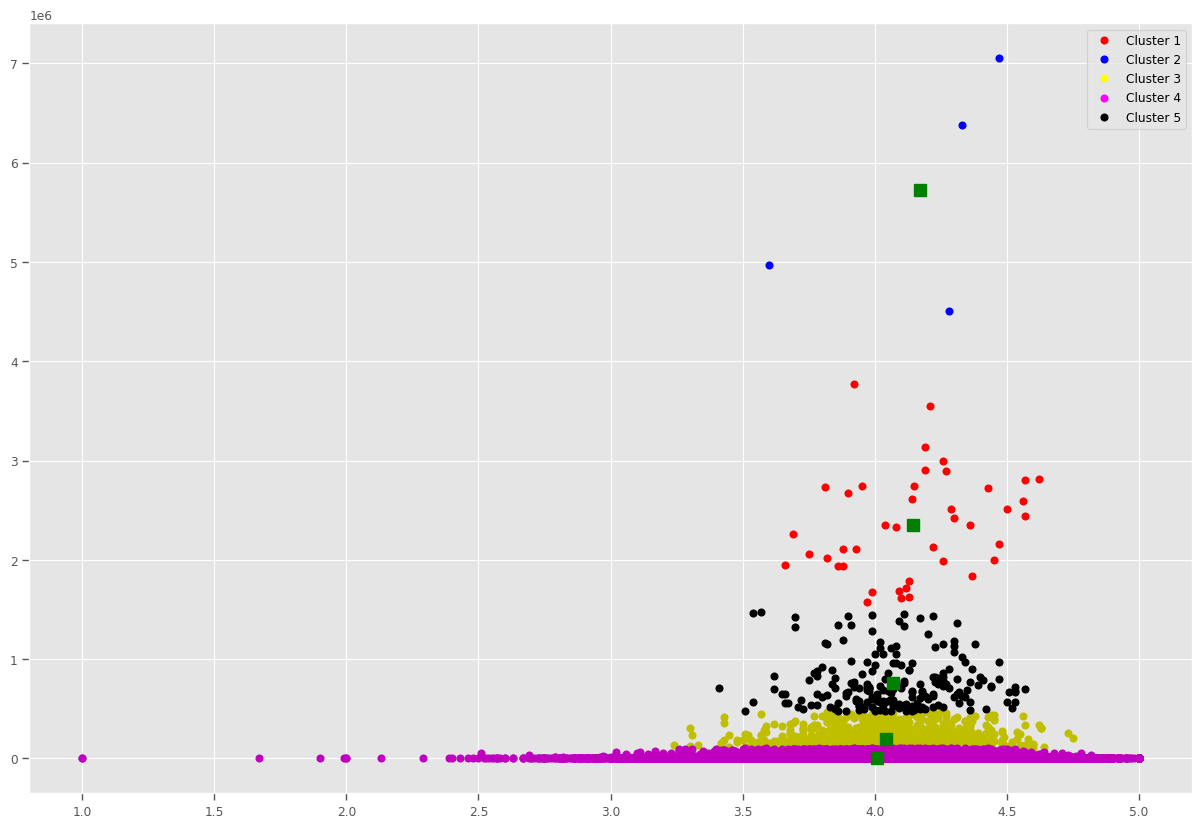

In [60]:
#Computing K means with K = 8, thus, taking it as 8 clusters
centroids, _ = kmeans(data, 5)

#assigning each sample to a cluster
#Vector Quantisation:

idx, _ = vq(data, centroids)
# some plotting using numpy's logical indexing
sns.set_context('paper')
plt.figure(figsize=(15,10))
plt.plot(data[idx==0,0],data[idx==0,1],'or',#red circles
     data[idx==1,0],data[idx==1,1],'ob',#blue circles
     data[idx==2,0],data[idx==2,1],'oy', #yellow circles
     data[idx==3,0],data[idx==3,1],'om', #magenta circles
     data[idx==4,0],data[idx==4,1],'ok',#black circles
    
     
        
        
        
        
        )
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=8, )




circle1 = Line2D(range(1), range(1), color = 'red', linewidth = 0, marker= 'o', markerfacecolor='red')
circle2 = Line2D(range(1), range(1), color = 'blue', linewidth = 0,marker= 'o', markerfacecolor='blue')
circle3 = Line2D(range(1), range(1), color = 'yellow',linewidth=0,  marker= 'o', markerfacecolor='yellow')
circle4 = Line2D(range(1), range(1), color = 'magenta', linewidth=0,marker= 'o', markerfacecolor='magenta')
circle5 = Line2D(range(1), range(1), color = 'black', linewidth = 0,marker= 'o', markerfacecolor='black')

plt.legend((circle1, circle2, circle3, circle4, circle5)
           , ('Cluster 1','Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'), numpoints = 1, loc = 0, )


plt.show()

From the above plot, now we can see that once the whole system can be classified into clusters. As the count increases, the rating would end up near the cluster given above. The green squares are the centroids for the given clusters.

As the rating count seems to decrease, the average rating seems to become sparser, with higher volatility and less accuracy.

# Recommendation Engine

Having seen the clustering, we can infer that there can be some recommendations which can happen with the relation between Average Rating and Ratings Count.

Taking the Ratings_Distribution (A self created classifying trend), the recommendation system works with the algortihm of K Nearest Neighbors.

Based on a book entered by the user, the nearest neighbours to it would be classified as the books which the user might like.

KNN is used for both classification and regression problems. In classification problems to predict the label of a instance we first find k closest instances to the given one based on the distance metric and based on the majority voting scheme or weighted majority voting(neighbors which are closer are weighted higher) we predict the labels.

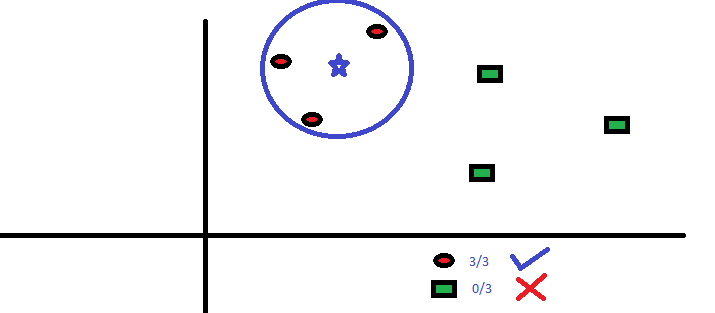

In [61]:
from IPython.display import display, Image

display(Image(filename='1_j95msWf8y2B_cbQVMzxFWg.png'))  # Use the correct path


In a setting such as this, the unsupervised learning takes place, with the similar neighbors being recommended. For the given list, if I ask recommendations for "The Catcher in the Rye", five books related to it would appear.

Creating a books features table, based on the Ratings Distribution, which classifies the books into ratings scale such as:

*Between 0 and 1

*Between 1 and 2

*Between 2 and 3

*Between 3 and 4

*Between 4 and 5

Broadly, the recommendations then consider the average ratings and ratings cout for the query entered.

In [62]:
books_features = pd.concat([df['Ratings_Dist'].str.get_dummies(sep=","), df['average_rating'], df['ratings_count']], axis=1)

In [63]:
books_features.head()

Between 0 and 1  Between 1 and 2  \
bookID                                                                          
2767052-the-hunger-games                                   0                0   
2.Harry_Potter_and_the_Order_of_the_Phoenix                0                0   
2657.To_Kill_a_Mockingbird                                 0                0   
1885.Pride_and_Prejudice                                   0                0   
41865.Twilight                                             0                0   

                                             Between 2 and 3  Between 3 and 4  \
bookID                                                                          
2767052-the-hunger-games                                   0                0   
2.Harry_Potter_and_the_Order_of_the_Phoenix                0                0   
2657.To_Kill_a_Mockingbird                                 0                0   
1885.Pride_and_Prejudice                                   0                0   
41865.Twilight                                             0                1   

                                             Between 4 and 5  average_rating  \
bookID                                                                         
2767052-the-hunger-games                                   1            4.33   
2.Harry_Potter_and_the_Order_of_the_Phoenix                1            4.50   
2657.To_Kill_a_Mockingbird                                 1            4.28   
1885.Pride_and_Prejudice                                   1            4.26   
41865.Twilight                                             0            3.60   

                                             ratings_count  
bookID                                                      
2767052-the-hunger-games                           6376780  
2.Harry_Potter_and_the_Order_of_the_Phoenix        2507623  
2657.To_Kill_a_Mockingbird                         4501075  
1885.Pride_and_Prejudice                           2998241  
41865.Twilight                                     4964519

The min-max scaler is used to reduce the bias which would have been present due to some books having a massive amount of features, yet the rest having less. Min-Max scaler would find the median for them all and equalize it.

In [64]:
min_max_scaler = MinMaxScaler()
books_features = min_max_scaler.fit_transform(books_features)

In [65]:
np.round(books_features, 2)

array([[0.  , 0.  , 0.  , ..., 1.  , 0.83, 0.9 ],
       [0.  , 0.  , 0.  , ..., 1.  , 0.88, 0.36],
       [0.  , 0.  , 0.  , ..., 1.  , 0.82, 0.64],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.68, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.71, 0.  ],
       [0.  , 0.  , 0.  , ..., 1.  , 0.75, 0.  ]], shape=(46662, 7))

In [66]:
model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree')
model.fit(books_features)
distance, indices = model.kneighbors(books_features)

Creating specific functions to help in finding the book names:

*Get index from Title

*Get ID from partial name (Because not everyone can remember all the names)

*Print the similar books from the feature dataset. (This uses the Indices metric from the nearest neighbors to pick the books.)

In [67]:
print(df[features].info())
print(df[features].head())

<class 'pandas.core.frame.DataFrame'>
Index: 46662 entries, 2767052-the-hunger-games to 10991547-daughter-of-helaman
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   average_rating  46662 non-null  float64
 1   #num_pages      46662 non-null  float64
 2   ratings_count   46662 non-null  int64  
 3   likedPercent    46662 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 2.8+ MB
None
                                             average_rating  #num_pages  \
bookID                                                                    
2767052-the-hunger-games                               4.33       374.0   
2.Harry_Potter_and_the_Order_of_the_Phoenix            4.50       870.0   
2657.To_Kill_a_Mockingbird                             4.28       324.0   
1885.Pride_and_Prejudice                               4.26       279.0   
41865.Twilight                                         3.60       501.0   


In [68]:
df['#num_pages'] = df['#num_pages'].astype(str)

In [69]:
df['#num_pages'] = df['#num_pages'].str.extract('(\d+)').astype(float)

In [70]:
df['#num_pages'] = pd.to_numeric(df['#num_pages'], errors='coerce')
df = df.dropna(subset=['#num_pages'])  # Drop rows with missing values

In [71]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Load data
   # Replace with your dataset file path
df = pd.read_csv('trial.csv')
# Replace with your dataset

# Select relevant features for clustering
features = ['average_rating', '#num_pages', 'ratings_count', 'likedPercent']

# Clean the '#num_pages' column
# Step 1: Convert to string (if not already)
df['#num_pages'] = df['#num_pages'].astype(str)

# Step 2: Extract numeric values
df['#num_pages'] = df['#num_pages'].str.extract('(\d+)').astype(float)

# Step 3: Handle missing or invalid values
df['#num_pages'] = pd.to_numeric(df['#num_pages'], errors='coerce')
df = df.dropna(subset=['#num_pages'])

# Ensure all features are numeric
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop rows with missing or invalid values
df = df.dropna(subset=features)

# Standardize the features
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Silhouette Score
best_k = 0
best_score = -1
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Optimal number of clusters: {best_k} with Silhouette Score: {best_score}")

# Apply K-Means with the best k
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

# Function to get the index of a book by its title
def get_index_from_name(name):
    return df[df["title"] == name].index.tolist()[0]

# Function to get book names containing a partial string
def get_id_from_partial_name(partial):
    all_books_names = list(df.title.values)
    for name in all_books_names:
        if partial.lower() in name.lower():  # Case-insensitive search
            print(f"Book: {name}, Index: {all_books_names.index(name)}")

# Function to print similar books based on query or ID
def print_similar_books(query=None, id=None):
    if id:
        # Find books in the same cluster as the given ID
        cluster = df.iloc[id]['cluster']
        similar_books = df[df['cluster'] == cluster]
        similar_books = similar_books[similar_books.index != id]  # Exclude the input book
        similar_books = similar_books.sort_values(by='average_rating', ascending=False)
        
        print(f"\nBooks similar to '{df.iloc[id]['title']}':")
        for i, row in similar_books.iterrows():
            print(f"{row['title']} by {row['authors']} (Rating: {row['average_rating']}, Pages: {row['#num_pages']})")
    
    if query:
        # Find the index of the query book
        try:
            found_id = get_index_from_name(query)
            # Find books in the same cluster as the query book
            cluster = df.iloc[found_id]['cluster']
            similar_books = df[df['cluster'] == cluster]
            similar_books = similar_books[similar_books.index != found_id]  # Exclude the input book
            similar_books = similar_books.sort_values(by='average_rating', ascending=False)
            
            print(f"\nBooks similar to '{query}':")
            for i, row in similar_books.iterrows():
                print(f"{row['title']} by {row['authors']} (Rating: {row['average_rating']}, Pages: {row['#num_pages']})")
        except IndexError:
            print(f"Book '{query}' not found in the dataset.")

# # Example usage
# print("\nSearching for books containing 'Hunger':")
# get_id_from_partial_name("Hunger")  # Find books with "Hunger" in the title

# print("\nPrinting similar books for 'The Hunger Games':")
# print_similar_books(query="The Hunger Games")  # Find similar books by query

# print("\nPrinting similar books for ID 0:")
# print_similar_books(id=0)  # Find similar books by ID

Optimal number of clusters: 4 with Silhouette Score: 0.32855315277199004


Checking out the Workings of the System, let's try with following examples.

*System by Name: The Hunger Game

*System by Name: J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings

*System by partial name: Harry Potter


The Hunger Games

In [72]:
print_similar_books("The Hunger Games")


Books similar to 'The Hunger Games':
Harry Potter and the Deathly Hallows by J.K. Rowling (Rating: 4.62, Pages: 759.0)
Harry Potter and the Prisoner of Azkaban by J.K. Rowling, Mary GrandPré (Illustrator) (Rating: 4.57, Pages: 435.0)
Harry Potter and the Order of the Phoenix by J.K. Rowling, Mary GrandPré (Illustrator) (Rating: 4.5, Pages: 870.0)
Harry Potter and the Sorcerer's Stone by J.K. Rowling, Mary GrandPré (Illustrator) (Rating: 4.47, Pages: 309.0)
The Help by Kathryn Stockett (Goodreads Author) (Rating: 4.47, Pages: 451.0)
The Book Thief by Markus Zusak (Goodreads Author) (Rating: 4.37, Pages: 552.0)
The Fellowship of the Ring by J.R.R. Tolkien (Rating: 4.36, Pages: 527.0)
The Kite Runner by Khaled Hosseini (Goodreads Author), Berliani M. Nugrahani (Translator) (Rating: 4.3, Pages: 371.0)
To Kill a Mockingbird by Harper Lee (Rating: 4.28, Pages: 324.0)
Pride and Prejudice by Jane Austen, Anna Quindlen (Introduction) (Rating: 4.26, Pages: 279.0)
The Fault in Our Stars by John 

J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings

In [73]:
print_similar_books("J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings")


Books similar to 'J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings':
A Game of Thrones by George R.R. Martin (Rating: 4.45, Pages: 835.0)
The Complete Stories and Poems by Edgar Allan Poe (Rating: 4.38, Pages: 821.0)
The Stand by Stephen King (Goodreads Author), Bernie Wrightson (Illustrator) (Rating: 4.34, Pages: 1153.0)
The Brothers Karamazov by Fyodor Dostoyevsky, Fyodor Dostoyevsky, Richard Pevear (Translator), Larissa Volokhonsky (Translator) (Rating: 4.32, Pages: 796.0)
The Pillars of the Earth by Ken Follett (Goodreads Author) (Rating: 4.31, Pages: 976.0)
Gone with the Wind by Margaret Mitchell (Rating: 4.3, Pages: 1037.0)
The Chronicles of Narnia by C.S. Lewis, Pauline Baynes (Illustrator) (Rating: 4.26, Pages: 767.0)
A Prayer for Owen Meany by John Irving (Goodreads Author) (Rating: 4.23, Pages: 637.0)
Dune by Frank Herbert (Rating: 4.23, Pages: 661.0)
Outlander by Diana Gabaldon (Goodreads Author) (Rating: 4.23, Pages: 850.0)
Crime and Punishment by Fyod

Harry Potter

In [74]:
get_id_from_partial_name("Harry Potter")

Book: Harry Potter and the Order of the Phoenix, Index: 1
Book: Harry Potter and the Sorcerer's Stone, Index: 32
Book: Harry Potter and the Deathly Hallows, Index: 71
Book: Harry Potter and the Prisoner of Azkaban, Index: 93
